### Practice Question 1

**Using `quantecon`, create a MarkovChain object that has the following properties. Simulate it for `T=100`.**

*Description of Markov Process*

Wages can be in one of three states: 10, 20, or 30.
If $w_t = 10$, then there is a .5 probability that $w_{t+1}=10$ and a .5 probability that $w_{t+1} = 20$. If $w_t = 20$, there is a .5 probability that $w_{t+1} = 20$, a .25 probability that $w_{t+1} = 10$ and .25 probability that $w_{t+1} = 30$. If $w_t = 30$, then there is a .5 probability that $w_{t+1} = 30$ and a .5 probability that $w_{t+1}= 20$.






SOLUTION:

We can create a simulate the Markov process with the `quantecon` package like so:

In [1]:
import numpy as np
from numba import jit
import matplotlib.pyplot as plt
import quantecon as qe
np.set_printoptions(precision=2, suppress=True)

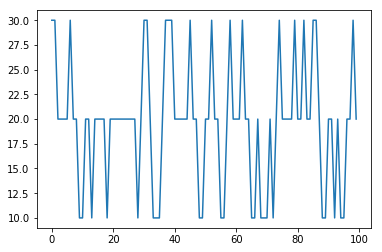

In [2]:

state_values = np.array([10, 20, 30])
P = np.array([[.5, .5, 0],
              [.25, .5, .25],
              [0, .5, .5]])
mc = qe.markov.MarkovChain(P, state_values=state_values)
np.random.seed(123)
plt.plot(mc.simulate(100))

### Practice Question 2

**Approximate an AR(1) with a Finite State Markov Chain**

Consider the autoregressive stochastic process
$$
w_{t+1} = (1-\rho) \mu + \rho w_t + \epsilon_{t+1},
$$
where $\epsilon_{t+1}$ is an iid sequence of shocks that are Normally distributed with mean 0 and standard deviation $\sigma$.
Note that by assuming this form, we have the unconditional expectation $E[w_t] = \mu$ and unconditional variance $Var(w_t) = \frac{\sigma^2}{1-\rho^2}$.

Now, as we discussed in the lecture on [Finite State Markov chains](https://lectures.quantecon.org/py/finite_markov.html), we can [approximate this continuous state space markov process with a finite state markov chain.](https://lectures.quantecon.org/py/finite_markov.html#exercise-3)

Let us approximate this process with `n=50` points, with $\mu=30$, $\rho=.9$, and $\sigma=10$. Write code that uses `quantecon` to build this approximation.

SOLUTION:

The code below creates this approximation using the [tools](http://quanteconpy.readthedocs.io/en/latest/markov/approximation.html#quantecon.markov.approximation.rouwenhorst) in the `quantecon` package:

In [3]:
import numpy as np
from numba import jit
import matplotlib.pyplot as plt
import quantecon as qe
np.set_printoptions(precision=2, suppress=True)

n = 50
rho = .9
mu = 10
sigma = 1
ybar = mu * (1-rho)
mc = qe.markov.approximation.rouwenhorst(n, ybar, sigma, rho)

Below you can see the nodes and the transition matrix associated with this approximation, respectively.

In [4]:
mc.state_values

array([-6.06, -5.4 , -4.75, -4.09, -3.44, -2.78, -2.13, -1.47, -0.82,
       -0.16,  0.5 ,  1.15,  1.81,  2.46,  3.12,  3.77,  4.43,  5.08,
        5.74,  6.39,  7.05,  7.71,  8.36,  9.02,  9.67, 10.33, 10.98,
       11.64, 12.29, 12.95, 13.61, 14.26, 14.92, 15.57, 16.23, 16.88,
       17.54, 18.19, 18.85, 19.5 , 20.16, 20.82, 21.47, 22.13, 22.78,
       23.44, 24.09, 24.75, 25.4 , 26.06])

In [5]:
mc.P

array([[0.08, 0.21, 0.26, ..., 0.  , 0.  , 0.  ],
       [0.  , 0.09, 0.22, ..., 0.  , 0.  , 0.  ],
       [0.  , 0.01, 0.1 , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.1 , 0.01, 0.  ],
       [0.  , 0.  , 0.  , ..., 0.22, 0.09, 0.  ],
       [0.  , 0.  , 0.  , ..., 0.26, 0.21, 0.08]])

### Practice Question 3

**How would you modify the McCall Search model if wages were instead governed by a finite state markov chain?**

In [6]:
# Your Code Here